# 1. Conhecendo o conjunto de dados

[dataset](https://github.com/zalandoresearch/fashion-mnist) que será usado.

[THE MNIST DATABASE](http://yann.lecun.com/exdb/mnist/)

Bases de dados:

- [keras](https://keras.io/api/datasets/)
- [kagle](https://keras.io/api/datasets/)

![](https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

In [1]:
import tensorflow
from tensorflow import keras
import keras

dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_testes)) = dataset.load_data()

imagens_treino

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [2]:
display(len(imagens_treino))
display(imagens_treino.shape)

60000

(60000, 28, 28)

In [3]:
display(len(imagens_teste))
display(imagens_teste.shape)

10000

(10000, 28, 28)

In [4]:
display(len(identificacoes_treino))
display(len(identificacoes_testes))

60000

10000

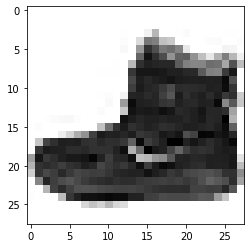

In [5]:
# Visualizando uma imagem:

import matplotlib.pyplot as plt

plt.imshow(imagens_treino[0], cmap='binary')

Outras API de deep learning além do Keras:

- [Caffe](http://caffe.berkeleyvision.org/) do grupo de pesquisa da universidade de Berkeley,
- [Torch](http://torch.ch/) uma implementação usando Lua,
- [PyTorch](https://pytorch.org/) uma variação do Torch para Python,
- [CNTK](https://www.microsoft.com/en-us/cognitive-toolkit/) da Microsoft,
- [DL4J](https://deeplearning4j.org/) uma implementação usando Java,
- [MXNet](https://mxnet.incubator.apache.org/)  da Apache.

# 2. Começando a montar o modelo

In [6]:
intervalo = (identificacoes_treino.min(), identificacoes_treino.max())
total_de_classificacao = intervalo[1] - intervalo[0] + 1
total_de_classificacao

10

Text(0.5, 1.0, '9')

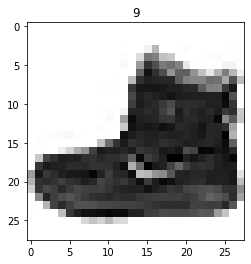

In [7]:
import matplotlib.pyplot as plt

plt.imshow(imagens_treino[0], cmap='binary')
plt.title(identificacoes_treino[0])

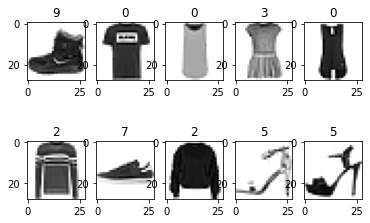

In [8]:
for imagem in range(total_de_classificacao):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem], cmap='binary')
    plt.title(identificacoes_treino[imagem])

Mas o que significa cada label desses? na documentação no [github](https://github.com/zalandoresearch/fashion-mnist/blob/master/README.md) nos diz o que significa cada um 

### Labels
Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

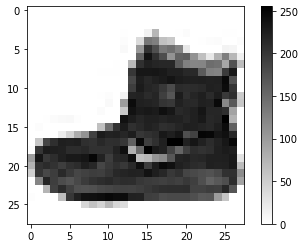

In [9]:
nomes_de_classificacao = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco',
                          'Sandalha', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

# for imagem in range(total_de_classificacao):
#     plt.subplot(2, 5, imagem+1)
#     plt.imshow(imagens_treino[imagem], cmap='binary')
#     plt.title(nomes_de_classificacao[identificacoes_treino[imagem]])
    
plt.imshow(imagens_treino[0], cmap='binary')
plt.colorbar()


In [10]:
modelo = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28))]) 

[código](http://scipy-lectures.org/advanced/image_processing/) para pré processamento de imagens.

# 3. Adicionando camadas ocultas

## Adicionando a camada 1:

In [11]:
modelo = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(256, activation=tensorflow.nn.relu),
        keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
) 

# modelo.fit(imagens_treino, identificacoes_treino)

# 4. Ensinando o modelo

In [12]:
# Normalizando as imagens:
# imagens_treino = imagens_treino/float(255)

modelo = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(256, activation=tensorflow.nn.relu),
        keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
) 

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 5s 2ms/step - loss: 3.8704


Camada oculta: Porque temos uma ideia do que pode estar acontecendo, mas não temos certeza absoluta de como está sendo este processamento. O máximo a que chegamos de visualizar o que pode estar acontecendo é saber que cada vez mais estas camadas adicionais irão agrupando mais características das nossas imagens, então elas começam com menos, e vão agrupando mais.

x - media / desvio padrao

In [13]:
import numpy as np

media = np.mean(imagens_treino)
std = np.std(imagens_treino)

imagens_treino_normalizados = (imagens_treino - media)/std

In [14]:
imagens_treino[0].mean()

97.25382653061224

In [15]:
media

72.94035223214286

In [16]:
std

90.02118235130519

In [17]:
imagens_treino.ndim

3

In [22]:
# melhorando a segunda camada.

# Normalização:

# imagens_treino = imagens_treino/float(255)

modelo = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(256, activation=tensorflow.nn.relu),  # Camada oculta
        keras.layers.Dense(128, activation=tensorflow.nn.relu),  # Camada oculta
        keras.layers.Dense(64, activation=tensorflow.nn.relu),  # Camada oculta
        keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
) 

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
modelo.fit(imagens_treino_normalizados, identificacoes_treino)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.4625


# 5. Sabendo como medir o resultado do **modelo**

OBS: Os dados de testes também deveriam ser normalizados. Ver os seguintes links:

- [Alura](https://cursos.alura.com.br/forum/topico-imagens_treino-255-duvida-113920)
- [StackExchange](https://datascience.stackexchange.com/questions/27615/should-we-apply-normalization-to-test-data-as-well)
- [Google](https://cloud.google.com/architecture/data-preprocessing-for-ml-with-tf-transform-pt1?hl=pt-br)

Por que a perda não diminuiu? 

Este é um detalhe do próprio Notebook que estamos usando; há mecanismos por baixo dele, que faz toda a execução, ou Runtime em inglês, que vai guardando o estado, ou números de variáveis que estão rodando por debaixo dos panos em nosso modelo, pois quando ele erra algo, ele tem umas variáveis aleatórias por detrás dele, que vão mudando de acordo com o que ele vai aprendendo. Logo para resolver isso basta reiniciar o kernel.

In [14]:
# melhorando a segunda camada.

# Normalização:
imagens_treino = imagens_treino/float(255)

modelo = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(256, activation=tensorflow.nn.relu),  # Camada oculta
        keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
) 

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo.fit(imagens_treino, identificacoes_treino, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 36s 19ms/step - loss: 2.3027 - accuracy: 0.0990
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 2.3003 - accuracy: 0.1114
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 2.2880 - accuracy: 0.1661
Epoch 4/5
1875/1875 [==============================] - 38s 20ms/step - loss: 2.2579 - accuracy: 0.2304
Epoch 5/5
1875/1875 [==============================] - 39s 21ms/step - loss: 2.2098 - accuracy: 0.2318


In [15]:
# Realizando os predict

import numpy as np

testes = modelo.predict(imagens_teste)
print(f"Resultado: {np.argmax(testes[2])}")
print(f"Número da imagem de teste: {identificacoes_testes[2]}")

Resultado: 0
Número da imagem de teste: 1


In [16]:
modelo.evaluate(imagens_teste, identificacoes_testes)

313/313 [==============================] - 1s 3ms/step - loss: 764469.5625 - accuracy: 0.1654


[764469.5625, 0.16539999842643738]

A primeira posição que temos é a perda do nosso teste, e a segunda é a acurácia do mesmo

In [17]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_testes)
print(f"perda_teste: {perda_teste} ")
print(f"Acurácia do teste: {acuracia_teste}")


313/313 [==============================] - 1s 3ms/step - loss: 764469.5625 - accuracy: 0.1654
perda_teste: 764469.5625 
Acurácia do teste: 0.16539999842643738


In [18]:
# Adicionando dados para validação:

modelo = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(256, activation=tensorflow.nn.relu),  # Camada oculta
        keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
) 

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 [==============================] - 18s 11ms/step - loss: 2.3028 - accuracy: 0.1007 - val_loss: 2.3027 - val_accuracy: 0.0995
Epoch 2/5
1500/1500 [==============================] - 16s 11ms/step - loss: 2.3028 - accuracy: 0.0956 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 3/5
1500/1500 [==============================] - 18s 12ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 4/5
1500/1500 [==============================] - 16s 11ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 5/5
1500/1500 [==============================] - 15s 10ms/step - loss: 2.3027 - accuracy: 0.1029 - val_loss: 2.3026 - val_accuracy: 0.0983


Mas vejam que surgiram o val_loss e val_acc, o que será que eles são?

# 6. Ajustando e salvando o modelo

Para conseguirmos enxergar isso de maneira um pouco mais legal, pois aqui fica difícil entendermos se estamos indo bem ou mal, o que temos que ajustar ou não, podemos deixar tudo isso em um gráfico

In [19]:
# Adicionando dados para validação:

modelo = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(256, activation=tensorflow.nn.relu),  # Camada oculta
        keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
) 

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 [==============================] - 14s 9ms/step - loss: 2.3028 - accuracy: 0.0970 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 2.3026 - accuracy: 0.1020 - val_loss: 2.3017 - val_accuracy: 0.0957
Epoch 3/5
1500/1500 [==============================] - 17s 11ms/step - loss: 2.3012 - accuracy: 0.1197 - val_loss: 2.2987 - val_accuracy: 0.1712
Epoch 4/5
1500/1500 [==============================] - 18s 12ms/step - loss: 2.2972 - accuracy: 0.1526 - val_loss: 2.2920 - val_accuracy: 0.1003
Epoch 5/5
1500/1500 [==============================] - 16s 11ms/step - loss: 2.2898 - accuracy: 0.1567 - val_loss: 2.2820 - val_accuracy: 0.1961


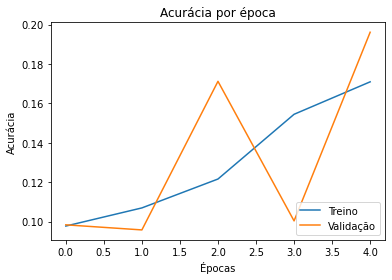

In [20]:
# Gráfico de acurácia

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'], loc='lower right')
plt.show()

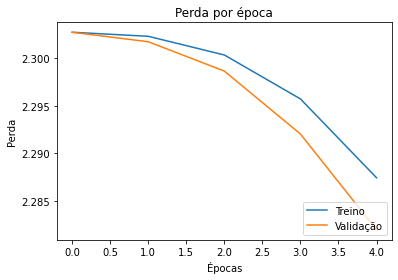

In [21]:
# Gráfico de perda

plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'], loc='lower right')
plt.show()

In [22]:
# Aumentando o número de épocas

modelo = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(256, activation=tensorflow.nn.relu),  # Camada oculta
        keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
) 

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 23s 15ms/step - loss: 2.3028 - accuracy: 0.1017 - val_loss: 2.3025 - val_accuracy: 0.0957
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 2.3020 - accuracy: 0.1073 - val_loss: 2.3006 - val_accuracy: 0.1618
Epoch 3/10
1500/1500 [==============================] - 17s 11ms/step - loss: 2.2996 - accuracy: 0.1430 - val_loss: 2.2951 - val_accuracy: 0.1759
Epoch 4/10
1500/1500 [==============================] - 13s 9ms/step - loss: 2.2925 - accuracy: 0.1675 - val_loss: 2.2834 - val_accuracy: 0.2718
Epoch 5/10
1500/1500 [==============================] - 13s 9ms/step - loss: 2.2796 - accuracy: 0.2092 - val_loss: 2.2663 - val_accuracy: 0.1661
Epoch 6/10
1500/1500 [==============================] - 16s 11ms/step - loss: 2.2608 - accuracy: 0.2196 - val_loss: 2.2430 - val_accuracy: 0.1943
Epoch 7/10
1500/1500 [==============================] - 14s 9ms/step - loss: 2.2372 - accuracy: 0.2521 - val_loss: 2.2164 - val

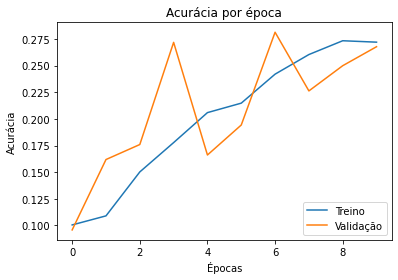

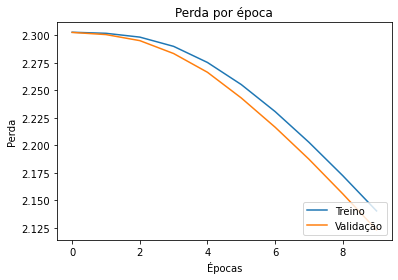

In [23]:
# Gráfico de acurácia

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'], loc='lower right')
plt.show()

# Gráfico de perda

plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'], loc='lower right')
plt.show()

In [24]:
# Vamos deixar as épocaso onde parece está mais estável. 
# Adicionando um Dropout para reduzir o overfitting e fazer nossos neurônios adormecerem um pouco.

modelo = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(256, activation=tensorflow.nn.relu),  # Camada oculta
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
) 

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 14s 9ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3025 - val_accuracy: 0.0983
Epoch 2/5
1500/1500 [==============================] - 17s 12ms/step - loss: 2.3024 - accuracy: 0.1027 - val_loss: 2.3008 - val_accuracy: 0.1005
Epoch 3/5
1500/1500 [==============================] - 14s 9ms/step - loss: 2.3003 - accuracy: 0.1132 - val_loss: 2.2963 - val_accuracy: 0.2097
Epoch 4/5
1500/1500 [==============================] - 16s 11ms/step - loss: 2.2943 - accuracy: 0.1437 - val_loss: 2.2857 - val_accuracy: 0.3254
Epoch 5/5
1500/1500 [==============================] - 14s 9ms/step - loss: 2.2825 - accuracy: 0.2001 - val_loss: 2.2680 - val_accuracy: 0.2171


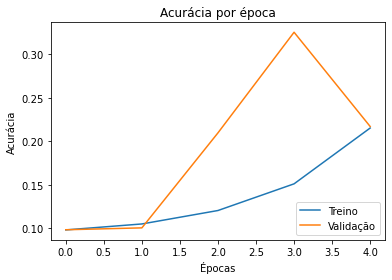

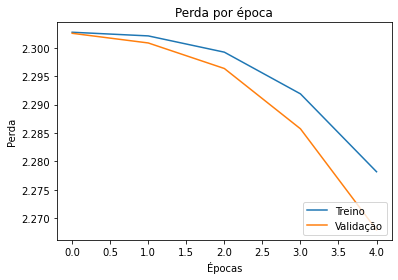

In [25]:
# Gráfico de acurácia

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'], loc='lower right')
plt.show()

# Gráfico de perda

plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'], loc='lower right')
plt.show()


In [26]:
modelo.save('modelo.h5')
modelo_salvo = keras.models.load_model('modelo.h5')

In [27]:
# Realizando os predict com o modelo salvo

import numpy as np

testes = modelo.predict(imagens_teste)
print(f"Resultado: {np.argmax(testes[1])}")
print(f"Número da imagem de teste: {identificacoes_testes[1]}")

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print(f"Resultado modelo salvo: {np.argmax(testes_modelo_salvo[1])}")
print(f"Número da imagem de teste: {identificacoes_testes[1]}")

Resultado: 4
Número da imagem de teste: 2
Resultado modelo salvo: 4
Número da imagem de teste: 2


# 7. Revisando conceitos chave
